In [297]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

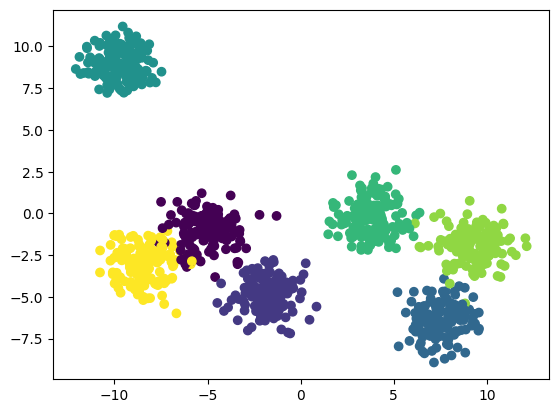

In [298]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2, random_state=33)
plt.scatter(X[:, 0], X[:, 1], c=y)

### Standardization

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Elbow method to select K value

In [301]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1339.9999999999995,
 658.0272177947647,
 243.9386065877252,
 153.24044529040154,
 98.38532434309026,
 61.396476975947145,
 39.979256824184915,
 37.47990631313322,
 34.58567362823308,
 31.113123861835508]

### Plot Elbow Curve

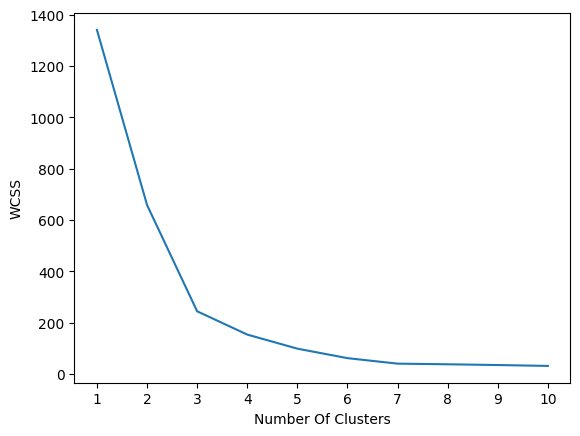

In [302]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

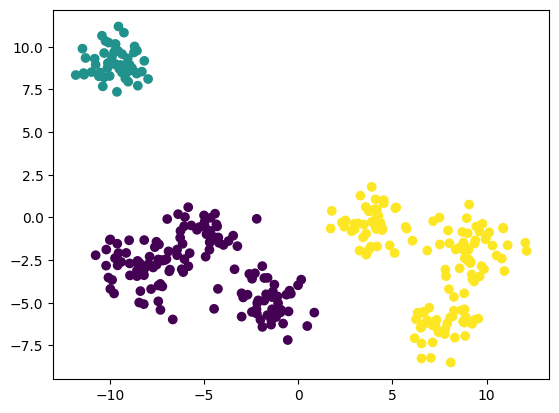

In [303]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X_train_scaled)
y_pred = kmeans.predict(X_test_scaled)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

## Validating the K value
- **Knee Locator**
- **Silhoutte Scoring**

### Knee Locator

In [304]:
!pip install kneed

In [305]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

### Silhoutte Scoring

In [306]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_coefficients.append(score)

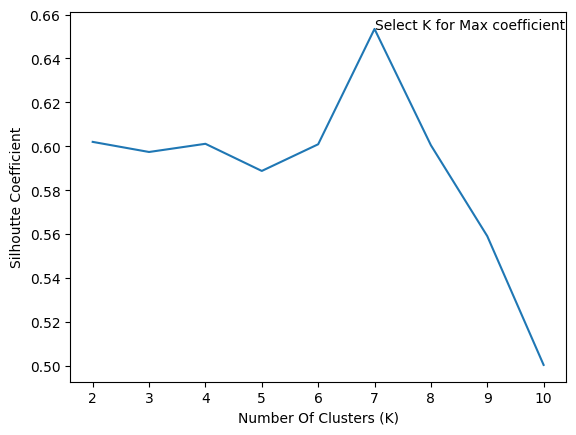

In [307]:
plt.plot(range(2, 11), silhoutte_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number Of Clusters (K)')
plt.ylabel('Silhoutte Coefficient')
plt.annotate(
    "Select K for Max coefficient",
    xy=(range(2, 11)[np.argmax(silhoutte_coefficients)], np.max(silhoutte_coefficients))
)
plt.show()